In [ ]:
!pip install -q datasets transformers==4.28.0

In [ ]:
!pip install torch torchvision
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install seaborn
!pip install tqdm
!pip install torchsummary
!pip install torchviz
!pip install pytorch-ignite
!pip install tensorboard
!pip install tensorboardX
!pip install querystring-parser
!pip install slicer
!pip install --upgrade pillow
!pip install ipywidgets
!pip install --upgrade jupyter

In [ ]:
# importing dependencies
import transformers
from datasets import load_dataset, Dataset
from textwrap import wrap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from transformers import AutoProcessor, AutoModelForCausalLM, TrainingArguments, Trainer, EncoderDecoderModel
#from evaluate import load
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
import base64
import os
import io

In [ ]:
# loading dataset
ds = load_dataset("ashraq/fashion-product-images-small")

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'image'],
        num_rows: 44072
    })
})

In [ ]:
train_ds = ds['train']

In [ ]:
df = train_ds.to_pandas()
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...


In [ ]:
df.describe()

,id,year
count,44072.000000,44072.000000
mean,29550.072972,2012.781970
std,16974.738560,2.108125
min,1163.000000,2007.000000
25%,14721.750000,2011.000000
50%,28488.500000,2012.000000
75%,44408.500000,2015.000000
max,60000.000000,2019.000000


In [ ]:
df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
image                 0
dtype: int64

In [ ]:
fig = px.bar(df.groupby('masterCategory').count().reset_index(), x='masterCategory',y='id',title='Count per Product Category')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [ ]:
df[df['masterCategory'] == 'Personal Care'].head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
24,18461,Men,Personal Care,Fragrance,Deodorant,White,Spring,2017.0,Casual,David Beckham Signature Men Deos,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
28,56019,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017.0,Casual,Colorbar Soft Touch Show Stopper Copper Lipsti...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
66,43993,Women,Personal Care,Fragrance,Perfume and Body Mist,Pink,Spring,2017.0,Casual,Police Women Passion Perfume,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
97,43967,Women,Personal Care,Fragrance,Perfume and Body Mist,Red,Spring,2017.0,Casual,DKNY Women Red Delicious Perfume,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
131,36934,Women,Personal Care,Fragrance,Perfume and Body Mist,Gold,Spring,2017.0,Casual,Giorgio Armani Women Idole Perfume,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...


In [ ]:
df[df['masterCategory'] == 'Free Items'].head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
348,53598,Men,Free Items,Free Gifts,Free Gifts,Black,Winter,2016.0,Sports,Q&Q Men Black Digital Watch,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
818,49696,Men,Free Items,Free Gifts,Ties,Blue,Summer,2012.0,Formal,Park Avenue Blue Patterned Tie,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
866,53591,Men,Free Items,Free Gifts,Free Gifts,White,Winter,2016.0,Casual,Q&Q Men White Dial Watch,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
1125,45894,Men,Free Items,Free Gifts,Free Gifts,Black,Winter,2016.0,Casual,Maxima Men Black Dial Watch,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
1344,53596,Men,Free Items,Free Gifts,Free Gifts,Navy Blue,Winter,2016.0,Casual,Q&Q Men Navy Blue Digital Watch,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...


In [ ]:
df[df['masterCategory'] == 'Sporting Goods'].head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
5003,13670,Unisex,Sporting Goods,Sports Equipment,Footballs,Gold,Fall,2011.0,Casual,Puma Unisex Liga XL Football,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
6007,2355,Unisex,Sporting Goods,Sports Equipment,Footballs,White,Fall,2010.0,Sports,ADIDAS Red Bull Trophy Soccer Unisex Football,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
9170,2354,Unisex,Sporting Goods,Sports Equipment,Basketballs,Black,Winter,2010.0,Sports,ADIDAS Black Bounce Unisex Basketball,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
11275,4010,Unisex,Sporting Goods,Sports Equipment,Basketballs,Brown,Summer,2011.0,Sports,Spalding 150 SZ Brown Basketball,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
11821,1553,Unisex,Sporting Goods,Sports Equipment,Footballs,White,Fall,2010.0,Sports,Puma Power Cat Hard Ground Football,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...


In [ ]:
df[df['masterCategory'] == 'Home'].head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
12136,40826,Unisex,Home,Home Furnishing,Cushion Covers,Yellow,Fall,2012.0,Home,Swayam Unisex Yellow and Orange Cushion Covers...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...


In [ ]:
values_to_drop = ['Personal Care', 'Free Items', 'Sporting Goods', 'Home']
filtered_df = df[~df['masterCategory'].isin(values_to_drop)]

In [ ]:
print(len(df))
print(len(filtered_df))

44072
41802


In [ ]:
fig = px.bar(filtered_df.groupby('masterCategory').count().reset_index(), x='masterCategory',y='id',title='Count per Product Category')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [ ]:
###############################################################

In [ ]:
fig = px.bar(filtered_df.groupby('subCategory').count().reset_index(), x='subCategory',y='id',title='Count per Product Sub-category', color='subCategory')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [ ]:
print(filtered_df['subCategory'].value_counts())

Topwear                     15383
Shoes                        7323
Bags                         3053
Bottomwear                   2685
Watches                      2542
Innerwear                    1806
Jewellery                    1079
Eyewear                      1073
Sandal                        961
Wallets                       925
Flip Flops                    913
Belts                         811
Socks                         698
Dress                         478
Loungewear and Nightwear      464
Saree                         427
Headwear                      293
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Stoles                         90
Mufflers                       38
Gloves                         20
Water Bottle                    7
Umbrellas                       6
Shoe Accessories                4
Sports Accessories              3
Perfumes      

In [ ]:
# Sandal; Flip Flops - Shoes

In [ ]:
train_ds = ds["train"]

In [ ]:
# Filter the dataset to keep rows with specified values

def filter_function(column_name, values_to_keep):
    def inner_filter(example):
        return example[column_name] in values_to_keep
    return inner_filter

# Specify the column_name and values_to_keep
#column_name = 'subCategory'
#values_to_keep = ['Sandal']

Innerwear = train_ds.filter(filter_function('subCategory', ['Innerwear']))
Jewellery = train_ds.filter(filter_function('subCategory', ['Jewellery']))
Eyewear = train_ds.filter(filter_function('subCategory', ['Eyewear']))
Sandal = train_ds.filter(filter_function('subCategory', ['Sandal']))
Flip_Flops = train_ds.filter(filter_function('subCategory', ['Flip Flops']))
Belts = train_ds.filter(filter_function('subCategory', ['Belts']))
lounge = train_ds.filter(filter_function('subCategory', ['Loungewear and Nightwear']))
Headwear = train_ds.filter(filter_function('subCategory', ['Headwear']))
Ties = train_ds.filter(filter_function('subCategory', ['Ties']))
Accessories = train_ds.filter(filter_function('subCategory', ['Accessories']))
Scarves = train_ds.filter(filter_function('subCategory', ['Scarves']))
Cufflinks = train_ds.filter(filter_function('subCategory', ['Cufflinks']))
Apparel_Set = train_ds.filter(filter_function('subCategory', ['Apparel Set']))
Stoles = train_ds.filter(filter_function('subCategory', ['Stoles']))
Mufflers = train_ds.filter(filter_function('subCategory', ['Mufflers']))

Filter:   0%|          | 0/44072 [00:00<?, ? examples/s]

Filter:   0%|          | 0/44072 [00:00<?, ? examples/s]

Filter:   0%|          | 0/44072 [00:00<?, ? examples/s]

In [ ]:
def plot_images(images, captions):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        caption = captions[i]
        caption = "\n".join(wrap(caption, 12))
        plt.title(caption)
        plt.imshow(images[i])
        plt.axis("off")

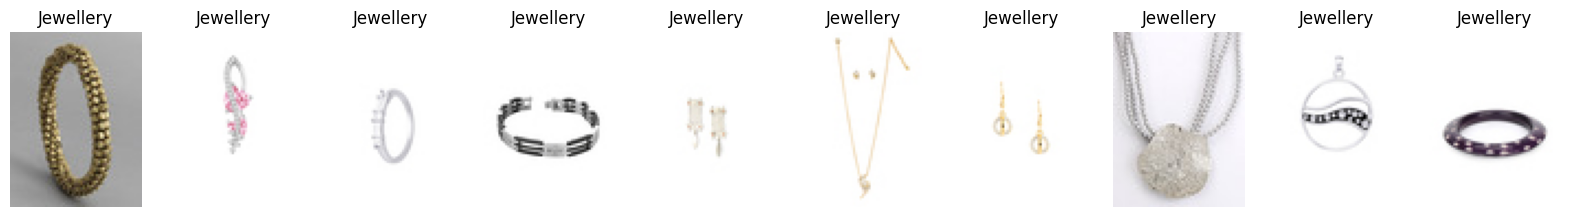

In [ ]:
plot_images([np.array(Jewellery[i]["image"]) for i in range(10)], [Jewellery[i]["subCategory"] for i in range(10)])

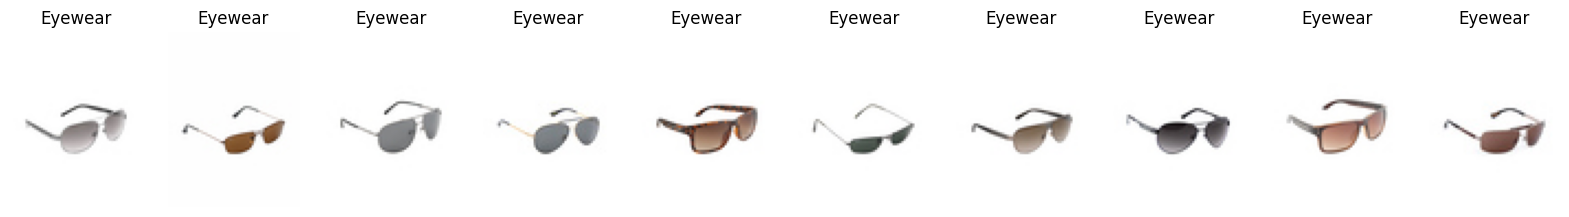

In [ ]:
plot_images([np.array(Eyewear[i]["image"]) for i in range(10)], [Eyewear[i]["subCategory"] for i in range(10)])

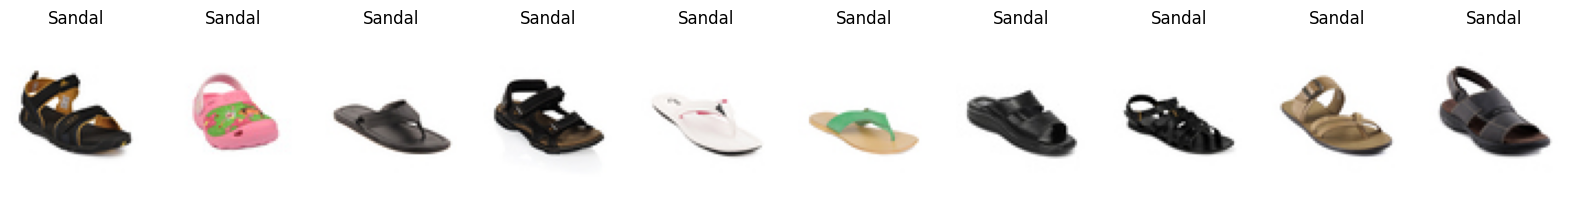

In [ ]:
plot_images([np.array(Sandal[i]["image"]) for i in range(10)], [Sandal[i]["subCategory"] for i in range(10)])

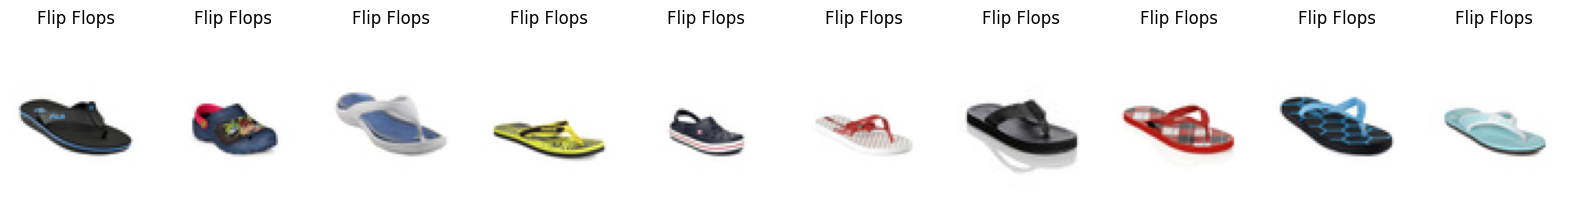

In [ ]:
plot_images([np.array(Flip_Flops[i]["image"]) for i in range(10)], [Flip_Flops[i]["subCategory"] for i in range(10)])

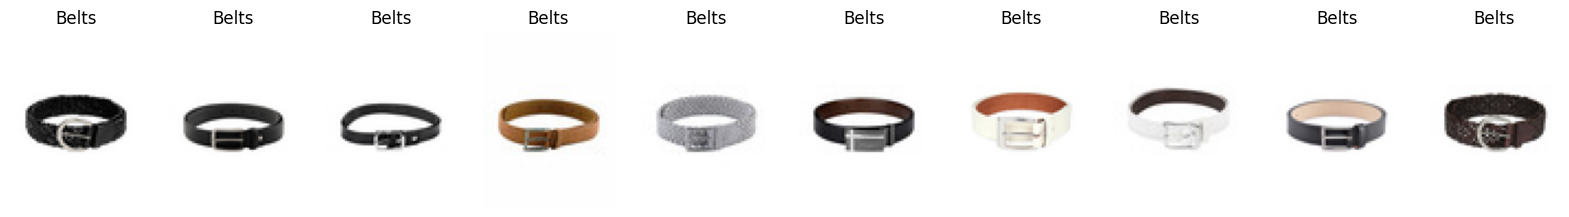

In [ ]:
plot_images([np.array(Belts[i]["image"]) for i in range(10)], [Belts[i]["subCategory"] for i in range(10)])

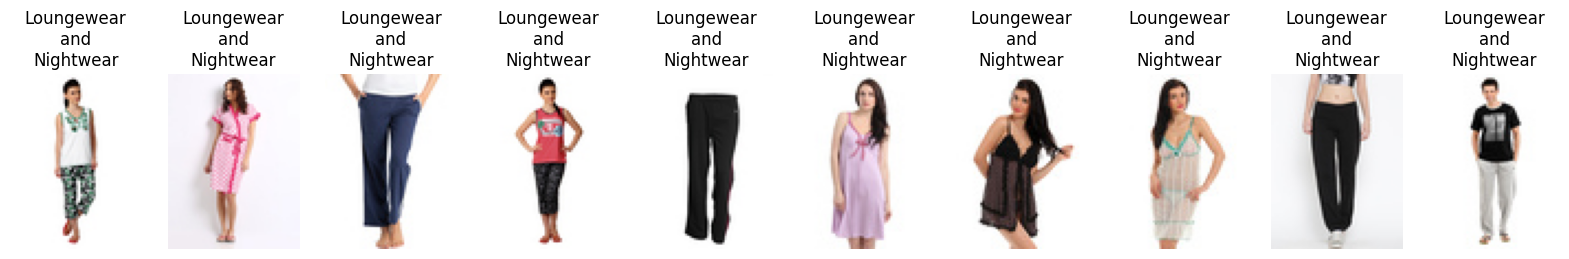

In [ ]:
plot_images([np.array(lounge[i]["image"]) for i in range(10)], [lounge[i]["subCategory"] for i in range(10)])

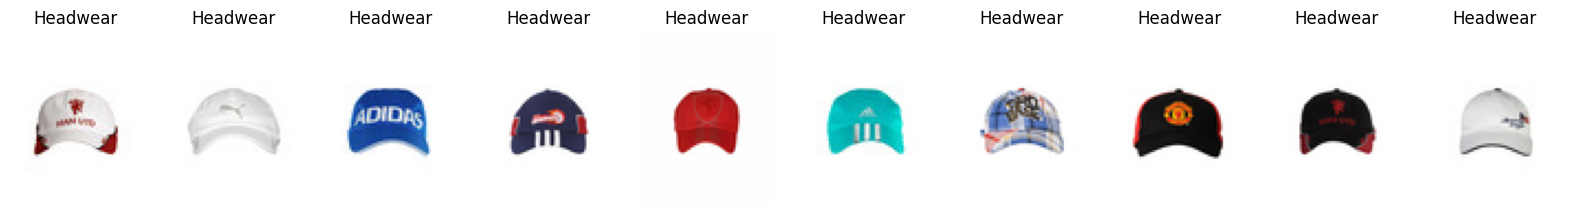

In [ ]:
plot_images([np.array(Headwear[i]["image"]) for i in range(10)], [Headwear[i]["subCategory"] for i in range(10)])

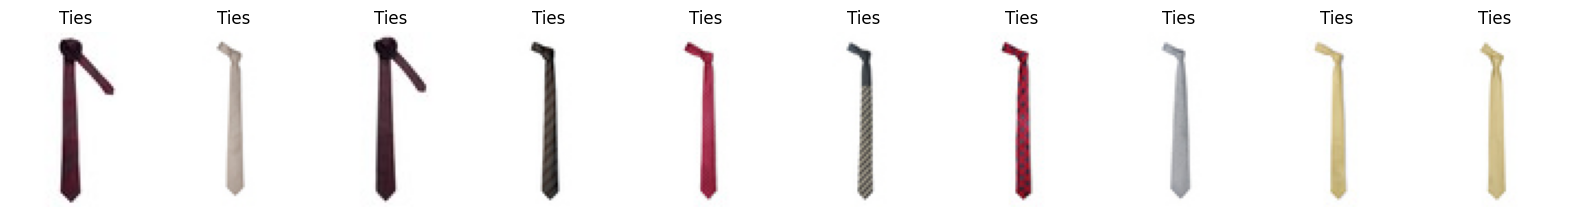

In [ ]:
plot_images([np.array(Ties[i]["image"]) for i in range(10)], [Ties[i]["subCategory"] for i in range(10)])

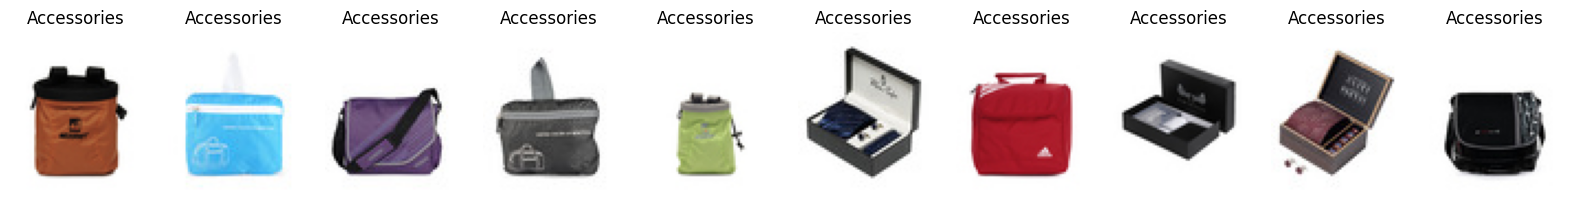

In [ ]:
plot_images([np.array(Accessories[i]["image"]) for i in range(10)], [Accessories[i]["subCategory"] for i in range(10)])

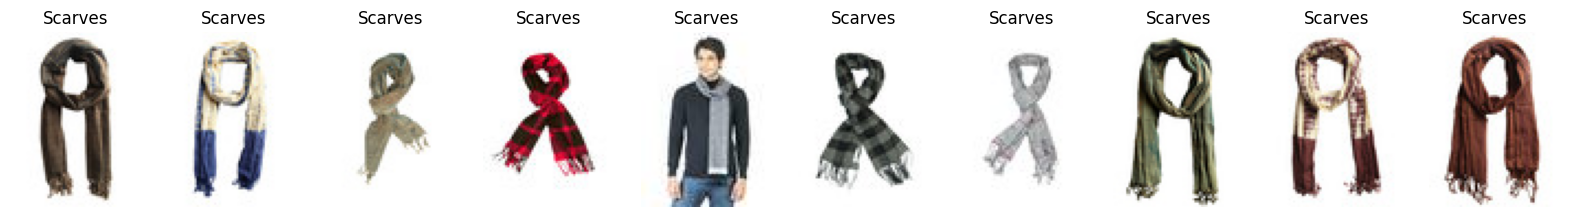

In [ ]:
plot_images([np.array(Scarves[i]["image"]) for i in range(10)], [Scarves[i]["subCategory"] for i in range(10)])

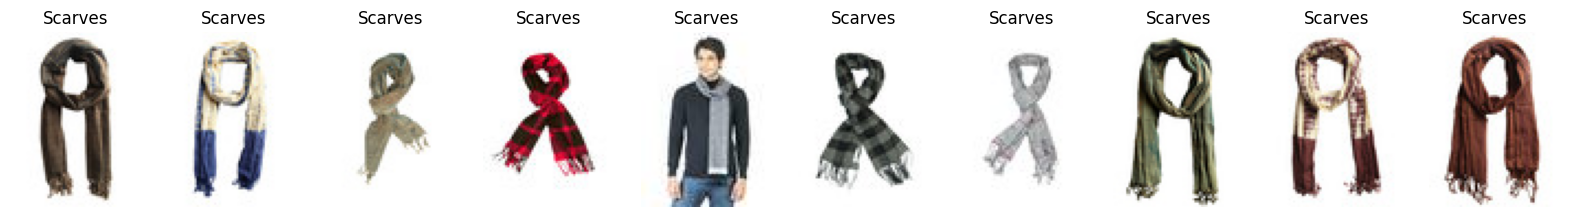

In [ ]:
plot_images([np.array(Scarves[i]["image"]) for i in range(10)], [Scarves[i]["subCategory"] for i in range(10)])

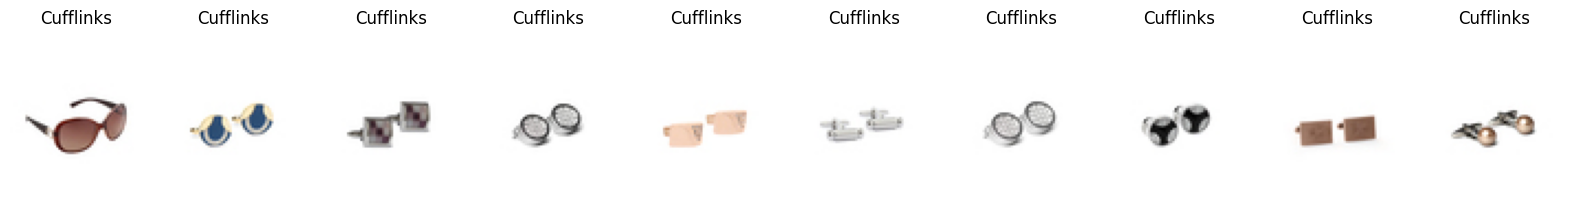

In [ ]:
plot_images([np.array(Cufflinks[i]["image"]) for i in range(10)], [Cufflinks[i]["subCategory"] for i in range(10)])

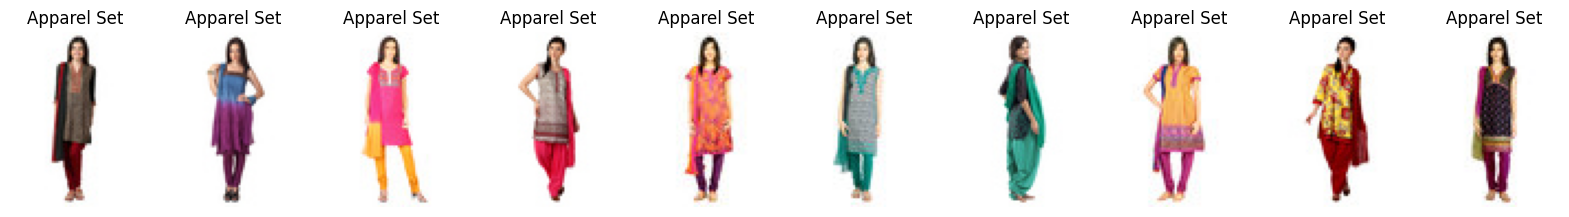

In [ ]:
plot_images([np.array(Apparel_Set[i]["image"]) for i in range(10)], [Apparel_Set[i]["subCategory"] for i in range(10)])

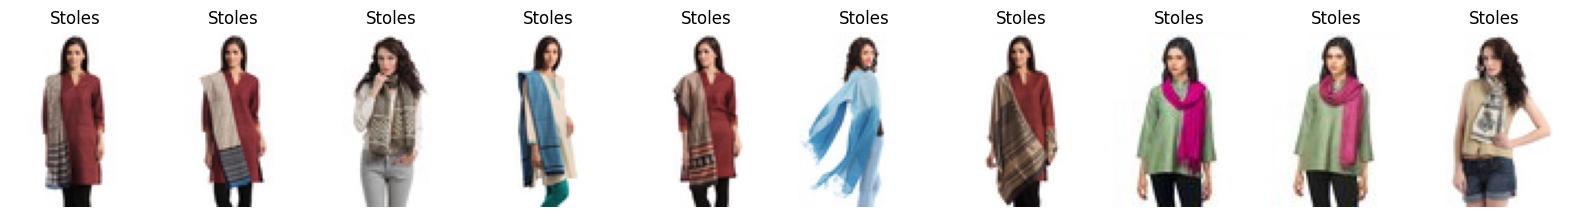

In [ ]:
plot_images([np.array(Stoles[i]["image"]) for i in range(10)], [Stoles[i]["subCategory"] for i in range(10)])

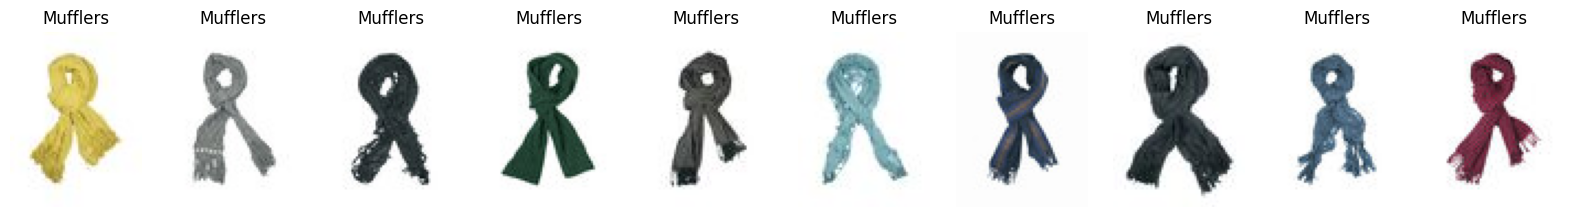

In [ ]:
plot_images([np.array(Mufflers[i]["image"]) for i in range(10)], [Mufflers[i]["subCategory"] for i in range(10)])

In [ ]:
########################################################3

In [ ]:
print(df[df['subCategory'] == 'Topwear']['articleType'].value_counts())

Tshirts          7064
Shirts           3212
Kurtas           1844
Tops             1762
Sweatshirts       285
Sweaters          277
Jackets           258
Kurtis            234
Tunics            229
Dupatta           116
Suspenders         40
Waistcoat          15
Rompers            12
Blazers             8
Rain Jacket         7
Shrug               6
Nehru Jackets       5
Lehenga Choli       4
Belts               3
Dresses             2
Name: articleType, dtype: int64


In [ ]:
print(df[df['subCategory'] == 'Bottomwear']['articleType'].value_counts())

Jeans                 602
Shorts                545
Trousers              530
Track Pants           304
Leggings              177
Capris                175
Skirts                128
Patiala                38
Jeggings               34
Stockings              32
Salwar                 32
Churidar               30
Tracksuits             29
Swimwear               13
Tights                  9
Salwar and Dupatta      7
Name: articleType, dtype: int64


In [ ]:
##########################################3####

In [ ]:
fig = px.bar(filtered_df.groupby('articleType').count().reset_index(), x='articleType',y='id',title='Count per Product articleType', color='articleType')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [ ]:
fig = px.bar(filtered_df.groupby('season').count().reset_index(), x='season', y='id', title='Count per Season Category')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [ ]:
fig = px.bar(filtered_df.groupby('usage').count().reset_index(), x='usage', y='id', title='Count per Usage Category')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [ ]:
###############################################

In [ ]:
# Specify the column name and values to be removed
column_name = 'masterCategory'
values_to_remove = ['Personal Care', 'Free Items', 'Sporting Goods', 'Home']

def filter_function(example):
    return example[column_name] not in values_to_remove

# Filter the dataset to remove rows with specified values
ds2 = train_ds.filter(filter_function)

Filter:   0%|          | 0/44072 [00:00<?, ? examples/s]

In [ ]:
ds2

Dataset({
    features: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'image'],
    num_rows: 41802
})

In [ ]:
# Specify the column name and values to be removed
column_name = 'subCategory'
values_to_remove = ['Innerwear', 'Saree', 'Accessories', 'Cufflinks', 'Apparel Set', 'Gloves', 'Water Bottle', 'Umbrellas', 'Shoe Accessories', 'Sports Accessories', 'Perfumes']

# Filter the dataset to remove rows with specified values
ds3 = ds2.filter(filter_function)

Filter:   0%|          | 0/41802 [00:00<?, ? examples/s]

In [ ]:
ds3

Dataset({
    features: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'image'],
    num_rows: 39185
})

In [ ]:
# Create ds4 with the updated values
ds4 = ds3.map(lambda example: {'subCategory': 'Shoes' if example['subCategory'] in ['Sandal', 'Flip Flops'] else example['subCategory']})
ds4 = ds4.map(lambda example: {'subCategory': 'Scarves' if example['subCategory'] in ['Stoles', 'Mufflers'] else example['subCategory']})


Map:   0%|          | 0/39185 [00:00<?, ? examples/s]

Map:   0%|          | 0/39185 [00:00<?, ? examples/s]

{'id': [15970, 39386, 59263, 21379, 53759], 'gender': ['Men', 'Men', 'Women', 'Men', 'Men'], 'masterCategory': ['Apparel', 'Apparel', 'Accessories', 'Apparel', 'Apparel'], 'subCategory': ['Topwear', 'Bottomwear', 'Watches', 'Bottomwear', 'Topwear'], 'articleType': ['Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts'], 'baseColour': ['Navy Blue', 'Blue', 'Silver', 'Black', 'Grey'], 'season': ['Fall', 'Summer', 'Winter', 'Fall', 'Summer'], 'year': [2011.0, 2012.0, 2016.0, 2011.0, 2012.0], 'usage': ['Casual', 'Casual', 'Casual', 'Casual', 'Casual'], 'productDisplayName': ['Turtle Check Men Navy Blue Shirt', 'Peter England Men Party Blue Jeans', 'Titan Women Silver Watch', 'Manchester United Men Solid Black Track Pants', 'Puma Men Grey T-shirt'], 'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7FDA9063EC50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7FDA9063D5D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=L size=60x80 at 0x7FDA9063

In [ ]:
from collections import Counter
print(Counter(ds4['subCategory']))

Counter({'Topwear': 15383, 'Shoes': 9197, 'Bags': 3053, 'Bottomwear': 2685, 'Watches': 2542, 'Jewellery': 1079, 'Eyewear': 1073, 'Wallets': 925, 'Belts': 811, 'Socks': 698, 'Dress': 478, 'Loungewear and Nightwear': 464, 'Headwear': 293, 'Ties': 258, 'Scarves': 246})


In [ ]:
ds5 = ds4.remove_columns(['id', 'gender', 'masterCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName'])
ds5 = ds5.rename_column("subCategory", "label")
ds5 = ds5.class_encode_column("label")
ds5

Casting to class labels:   0%|          | 0/39185 [00:00<?, ? examples/s]

Dataset({
    features: ['label', 'image'],
    num_rows: 39185
})